In [ ]:
!pip install streamlit

!pip install eemont

!pip install mss


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eemont: filename=eemont-0.3.6-py3-none-any.whl size=135742 sha256=2aeb3b992a229a7645be17a848f73704c3a4695851598fae8dc291658195742c
  Stored in directory: /root/.cache/pip/wheels/c2/79/2c/4fed17c3d3b466bbf4fe5872eec11f189147043b01152a4f75
  Created wheel for ee_e

In [ ]:
import ee
import geemap
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [ ]:
ee.Authenticate()
ee.Initialize(project='ee-tiagobettervide')

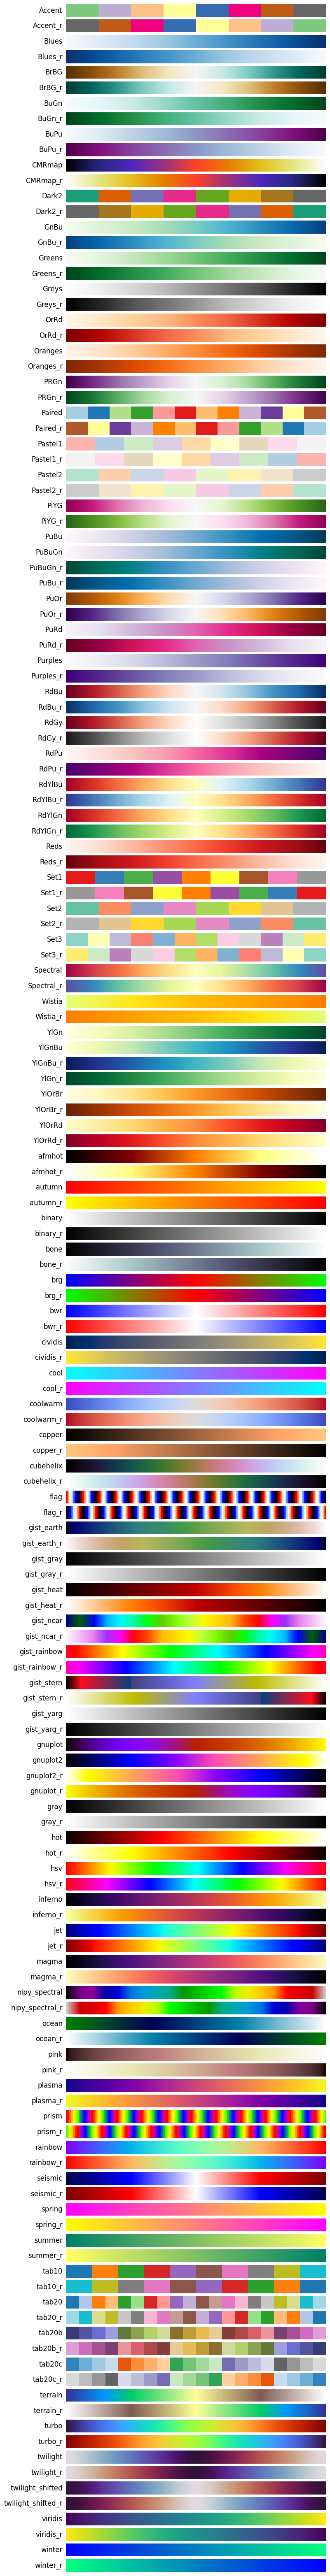

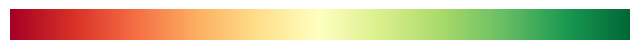

In [ ]:
import geemap.colormaps as cm
cm.plot_colormaps()
cm.plot_colormap('RdYlGn')


In [15]:
import ee
import geemap

# Inicializa o mapa
m = geemap.Map()

# Define a AOI (Área de interesse)
AOI = ee.FeatureCollection('users/bagnato/MBP/MB_Patagonia_Contorno')
m.addLayer(AOI, {}, 'Argentina')

# Carrega as coleções de imagens Landsat
imgColT1 = ee.ImageCollection('LANDSAT/LT05/C02/T1')  # Certifique-se de usar uma coleção suportada
imgColT2 = ee.ImageCollection('LANDSAT/LT05/C02/T2')  # Certifique-se de usar uma coleção suportada

# Filtra as imagens pela AOI
imgColT1 = imgColT1.filterBounds(AOI)
imgColT2 = imgColT2.filterBounds(AOI)

# Função para adicionar o NDVI
def addNDVI(image):
    ndvi = image.normalizedDifference(['B4', 'B3']).rename('NDVI')  # B4 = NIR, B3 = Red
    return image.addBands(ndvi)

# Aplica a função NDVI às coleções de imagens
imgColT1 = imgColT1.map(addNDVI)
imgColT2 = imgColT2.map(addNDVI)

# Filtra pelas datas
#start = '1985-01-01'
#end = '1986-01-01'

start = '1985-01-01'
end = '1986-01-01'


imgColT1 = imgColT1.filterDate(start, end)
imgColT2 = imgColT2.filterDate(start, end)

# Define a visualização do NDVI
ndvi_palette = [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
    '74A901', '66A000', '529400', '3E8601', '207401', '056201',
    '004C00', '023B01', '012E01', '011D01', '011301'
]

# Usar a lista de paletas diretamente
ndvi_viz = {
    'min': 0,
    'max': 1,
    'palette': ndvi_palette,  # Passe a lista diretamente
    'bands': 'NDVI'
}

# Adiciona camadas ao mapa
m.add_basemap('SATELLITE')
m.addLayer(imgColT1.median(), ndvi_viz, 'NDVI T1')
m.addLayer(imgColT2.median(), ndvi_viz, 'NDVI T2')

# Exibe o mapa
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [16]:
import ee
import geemap
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import urllib
from PIL import Image
import numpy as np

# Inicializa o Earth Engine
ee.Initialize()

# Definição da área de interesse
AOI = ee.FeatureCollection('users/bagnato/MBP/MB_Patagonia_Contorno')

# Função para adicionar a banda NDVI às imagens
def addNDVI(image):
    ndvi = image.normalizedDifference(['B4', 'B3']).rename('NDVI')  # B4 = NIR, B3 = Red
    return image.addBands(ndvi)

# Carregamento das coleções de imagens Landsat
imgColT1 = ee.ImageCollection('LANDSAT/LT05/C02/T1').filterBounds(AOI)
imgColT2 = ee.ImageCollection('LANDSAT/LT05/C02/T2').filterBounds(AOI)

# Aplicação da função NDVI às coleções de imagens
imgColT1 = imgColT1.map(addNDVI)
imgColT2 = imgColT2.map(addNDVI)

# Definindo a paleta de cores para visualização do NDVI
ndvi_palette = [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
    '74A901', '66A000', '529400', '3E8601', '207401', '056201',
    '004C00', '023B01', '012E01', '011D01', '011301'
]

# Dicionário para visualização do NDVI
ndvi_viz = {
    'min': 0,
    'max': 1,
    'palette': ndvi_palette,
}

# Nome do arquivo PDF onde os mosaicos serão salvos
pdf_filename = 'NDVI_Anual_T1_T2_1985_1997.pdf'

# Criação do arquivo PDF para salvar as imagens
with PdfPages(pdf_filename) as pdf:
    # Loop para cada ano de 1985 a 1997
    for year in range(1985, 1998):
        start_date = f'{year}-01-01'  # Data de início
        end_date = f'{year}-12-31'     # Data de fim

        # Filtra as coleções de imagens para o ano atual
        imgColT1_year = imgColT1.filterDate(start_date, end_date)
        imgColT2_year = imgColT2.filterDate(start_date, end_date)

        # Verifica se a coleção de imagens não está vazia
        if imgColT1_year.size().getInfo() > 0 and imgColT2_year.size().getInfo() > 0:
            # Cria os mosaicos de qualidade para T1 e T2
            mosaicoT1 = imgColT1_year.qualityMosaic('NDVI').select('NDVI')  # Seleciona apenas a banda NDVI
            mosaicoT2 = imgColT2_year.qualityMosaic('NDVI').select('NDVI')  # Seleciona apenas a banda NDVI

            # Loop para adicionar os mosaicos ao PDF
            for mosaic, title in [(mosaicoT1, f'NDVI T1 - {year}'), (mosaicoT2, f'NDVI T2 - {year}')]:
                # Obtenha uma miniatura da imagem
                img_thumbnail = mosaic.getThumbUrl(params={
                    'min': 0,
                    'max': 1,
                    'palette': ndvi_palette,
                    'format': 'png',
                    'dimensions': '800'  # A largura da miniatura em pixels
                })

                # Usa urllib para abrir a URL e carregar a imagem
                with urllib.request.urlopen(img_thumbnail) as response:
                    img = Image.open(response)  # Abre a imagem usando PIL
                    img_array = np.array(img)    # Converte a imagem para um array NumPy

                # Cria uma nova figura para salvar no PDF
                fig, ax = plt.subplots(figsize=(10, 6))

                # Plota a imagem no eixo
                ax.imshow(img_array)
                plt.title(title)  # Define o título da figura

                # Salva a figura após renderizar o mapa
                pdf.savefig(fig)
                plt.close()  # Fecha a figura para liberar memória

            print(f'PDF criado com sucesso: {pdf_filename}')
        else:
            print(f'Nenhuma imagem disponível para o ano {year}.')


PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
Nenhuma imagem disponível para o ano 1991.
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf


In [19]:
import ee
import geemap
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import urllib
from PIL import Image
import numpy as np


ee.Initialize()


AOI = ee.FeatureCollection('users/bagnato/MBP/MB_Patagonia_Contorno')


def addNDVI(image):
    ndvi = image.normalizedDifference(['B4', 'B3']).rename('NDVI')  # B4 = NIR, B3 = Red
    return image.addBands(ndvi)


imgColT1 = ee.ImageCollection('LANDSAT/LT05/C02/T1').filterBounds(AOI)
imgColT2 = ee.ImageCollection('LANDSAT/LT05/C02/T2').filterBounds(AOI)


imgColT1 = imgColT1.map(addNDVI)
imgColT2 = imgColT2.map(addNDVI)


ndvi_palette = [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
    '74A901', '66A000', '529400', '3E8601', '207401', '056201',
    '004C00', '023B01', '012E01', '011D01', '011301'
]


pdf_filename = 'NDVI_Anual_T1_T2_1985_1997.pdf'


south_america_aoi = AOI.geometry().bounds().getInfo()['coordinates']  # Pega os limites da área de interesse


with PdfPages(pdf_filename) as pdf:
    for year in range(1985, 1997):
        start_date = f'{year}-01-01'  # Data de início
        end_date = f'{year}-12-31'     # Data de fim


        imgColT1_year = imgColT1.filterDate(start_date, end_date)
        imgColT2_year = imgColT2.filterDate(start_date, end_date)

        # Verifica se a coleção de imagens não está vazia
        if imgColT1_year.size().getInfo() > 0 and imgColT2_year.size().getInfo() > 0:
            # Cria os mosaicos de qualidade para T1 e T2
            mosaicoT1 = imgColT1_year.qualityMosaic('NDVI').select('NDVI')
            mosaicoT2 = imgColT2_year.qualityMosaic('NDVI').select('NDVI')


            for mosaic, title in [(mosaicoT1, f'NDVI T1 - {year}'), (mosaicoT2, f'NDVI T2 - {year}')]:

                img_thumbnail = mosaic.getThumbUrl(params={
                    'min': 0,
                    'max': 1,
                    'palette': ndvi_palette,
                    'region': south_america_aoi,
                    'dimensions': '1000',
                    'format': 'png'
                })

                # Usa urllib para abrir a URL e carregar a imagem
                with urllib.request.urlopen(img_thumbnail) as response:
                    img = Image.open(response)  # Abre a imagem usando PIL
                    img_array = np.array(img)    # Converte a imagem para um array NumPy


                fig, ax = plt.subplots(figsize=(12, 8))  # Aumente o tamanho da figura para 12x8

                # Plota a imagem no eixo
                ax.imshow(img_array)
                ax.set_title(title, fontsize=16)  # Aumenta o tamanho da fonte do título
                ax.axis('off')  # Remove os eixos para melhor apresentação

                # Salva a figura após renderizar o mapa
                pdf.savefig(fig)
                plt.close()  # Fecha a figura para liberar memória

            print(f'PDF criado com sucesso: {pdf_filename}')
        else:
            print(f'Nenhuma imagem disponível para o ano {year}.')


PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
Nenhuma imagem disponível para o ano 1991.
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
PDF criado com sucesso: NDVI_Anual_T1_T2_1985_1997.pdf
